In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

### Load the interactions summary from Human Promoter Analysis

In [2]:
#df = pd.read_csv('Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')

# new method 1000 examples
run = 2
numEx = 5000
df = pd.read_csv('Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_Results_v9_run'+str(run)+'_'+str(numEx)+'/interactions_summary_attnLimit-0.12.txt',sep='\t')

In [3]:
df.shape

(5901, 12)

In [4]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter0<-->filter3,2,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2H2_tnt.AtIDD11_col_a_m1,0.016772,18.0,180.0,1669.0,1652.0,8.488437e-66,2.297252e-65
1,filter0<-->filter9,8,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB51_col_a_m1,0.004521,216.0,18.0,1794.0,2300.0,9.085282e-65,2.406406e-64
2,filter0<-->filter10,9,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.OBP1_col_a_m1,0.012554,204.0,204.0,2275.0,2258.0,7.636664e-125,5.327582e-124
3,filter0<-->filter13,12,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.005267,6.0,60.0,2536.0,3405.0,2.009452e-169,2.177760e-168
4,filter0<-->filter14,13,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,HB_tnt.ATHB40_col_a_m1,0.028770,12.0,126.0,2070.0,2750.0,3.486621e-272,7.929786e-271


##### keep significant interactions

In [5]:
df = df[df['adjusted_pval']<0.05]

In [6]:
df.shape

(5901, 12)

In [7]:
#df = df[(df['motif1_qval'] < 0.01) & (df['motif2_qval']<0.01)]

In [8]:
df.shape

(5901, 12)

### Get TF-TF interactions

In [9]:
df['TF_interaction'] = df.apply(lambda x: x['motif1']+r'$\longleftrightarrow$'+x['motif2'], axis=1)

In [10]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction
0,filter0<-->filter3,2,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2H2_tnt.AtIDD11_col_a_m1,0.016772,18.0,180.0,1669.0,1652.0,8.488437e-66,2.297252e-65,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...
1,filter0<-->filter9,8,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB51_col_a_m1,0.004521,216.0,18.0,1794.0,2300.0,9.085282e-65,2.406406e-64,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...
2,filter0<-->filter10,9,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.OBP1_col_a_m1,0.012554,204.0,204.0,2275.0,2258.0,7.636664e-125,5.327582e-124,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...
3,filter0<-->filter13,12,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.005267,6.0,60.0,2536.0,3405.0,2.009452e-169,2.177760e-168,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...
4,filter0<-->filter14,13,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,HB_tnt.ATHB40_col_a_m1,0.028770,12.0,126.0,2070.0,2750.0,3.486621e-272,7.929786e-271,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...


In [11]:
df = df[df['motif1']!=df['motif2']]

In [12]:
df = df.reset_index()
df.shape

(5527, 14)

In [13]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['motif1'][i]
    TF2 = df['motif2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


### Distribution of mean distance of interaction

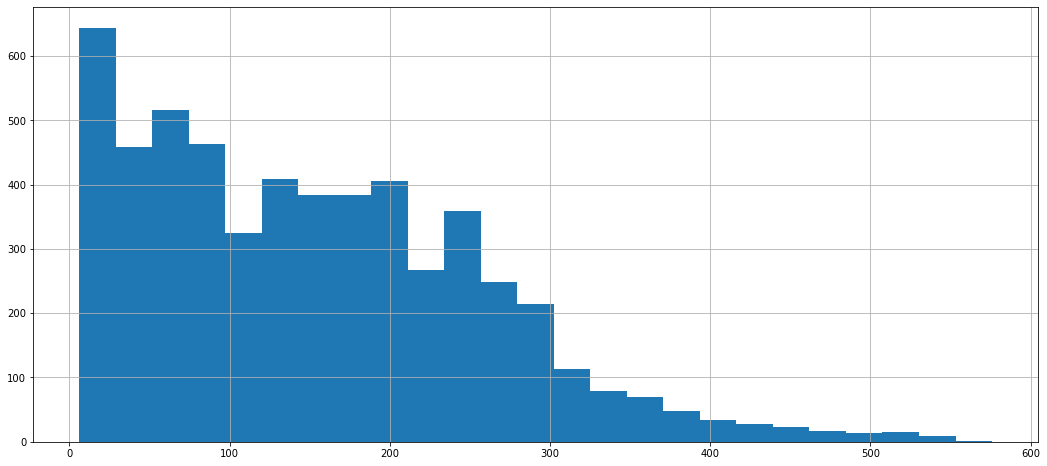

In [14]:
df['mean_distance'].hist(bins=25, figsize=(18,8))

In [15]:
df['mean_distance'].mean(),df['mean_distance'].median()

(151.98769676135336, 138.0)

### Most Frequent TF Family Interactions

In [16]:
df['TF_A_Family'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF_B_Family'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [17]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction,TF_A_Family,TF_B_Family
0,0,filter0<-->filter3,2,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2H2_tnt.AtIDD11_col_a_m1,0.016772,18.0,180.0,1669.0,1652.0,8.488437e-66,2.297252e-65,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,C2H2
1,1,filter0<-->filter9,8,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB51_col_a_m1,0.004521,216.0,18.0,1794.0,2300.0,9.085282e-65,2.406406e-64,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,MYB
2,2,filter0<-->filter10,9,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.OBP1_col_a_m1,0.012554,204.0,204.0,2275.0,2258.0,7.636664e-125,5.327582e-124,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,C2C2dof
3,3,filter0<-->filter13,12,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.005267,6.0,60.0,2536.0,3405.0,2.009452e-169,2.177760e-168,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like
4,4,filter0<-->filter14,13,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,HB_tnt.ATHB40_col_a_m1,0.028770,12.0,126.0,2070.0,2750.0,3.486621e-272,7.929786e-271,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,HB
5,5,filter0<-->filter15,14,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,WRKY_tnt.WRKY7_colamp_a_m1,0.000399,90.0,120.0,3241.0,3492.0,2.910253e-308,8.860309e-307,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,WRKY
6,6,filter0<-->filter18,17,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.AT1G69570_colamp_a_m1,0.001660,12.0,6.0,2867.0,3504.0,0.000000e+00,0.000000e+00,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,C2C2dof
7,7,filter0<-->filter20,19,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.009442,30.0,234.0,3334.0,4077.0,1.320068e-291,3.462917e-290,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like
8,8,filter0<-->filter23,22,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,GRF_tnt.AtGRF6_col_a_m1,0.038239,90.0,222.0,1825.0,1797.0,3.226615e-92,1.430648e-91,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,GRF
9,9,filter0<-->filter24,23,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2H2_tnt.AtIDD11_col_a_m1,0.031325,66.0,372.0,3086.0,3818.0,6.555940e-299,1.827456e-297,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,C2H2


In [18]:
df['Family_Interaction'] = df.apply(lambda x: x['TF_A_Family']+r'$\longleftrightarrow$'+x['TF_B_Family'],axis=1)

In [19]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF_A_Family'][i]
    TF2 = df['TF_B_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [20]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF_interaction,TF_A_Family,TF_B_Family,Family_Interaction
0,0,filter0<-->filter3,2,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2H2_tnt.AtIDD11_col_a_m1,0.016772,18.0,180.0,1669.0,1652.0,8.488437e-66,2.297252e-65,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,C2H2,Trihelix$\longleftrightarrow$C2H2
1,1,filter0<-->filter9,8,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,MYB_tnt.MYB51_col_a_m1,0.004521,216.0,18.0,1794.0,2300.0,9.085282e-65,2.406406e-64,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,MYB,Trihelix$\longleftrightarrow$MYB
2,2,filter0<-->filter10,9,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,C2C2dof_tnt.OBP1_col_a_m1,0.012554,204.0,204.0,2275.0,2258.0,7.636664e-125,5.327582e-124,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,C2C2dof,Trihelix$\longleftrightarrow$C2C2dof
3,3,filter0<-->filter13,12,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,G2like_tnt.AT2G40260_colamp_a_m1,0.005267,6.0,60.0,2536.0,3405.0,2.009452e-169,2.177760e-168,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,G2like,Trihelix$\longleftrightarrow$G2like
4,4,filter0<-->filter14,13,Trihelix_tnt.AT1G76880_col_a_m1,0.000651,HB_tnt.ATHB40_col_a_m1,0.028770,12.0,126.0,2070.0,2750.0,3.486621e-272,7.929786e-271,Trihelix_tnt.AT1G76880_col_a_m1$\longleftright...,Trihelix,HB,Trihelix$\longleftrightarrow$HB


In [21]:
df.shape

(5527, 17)

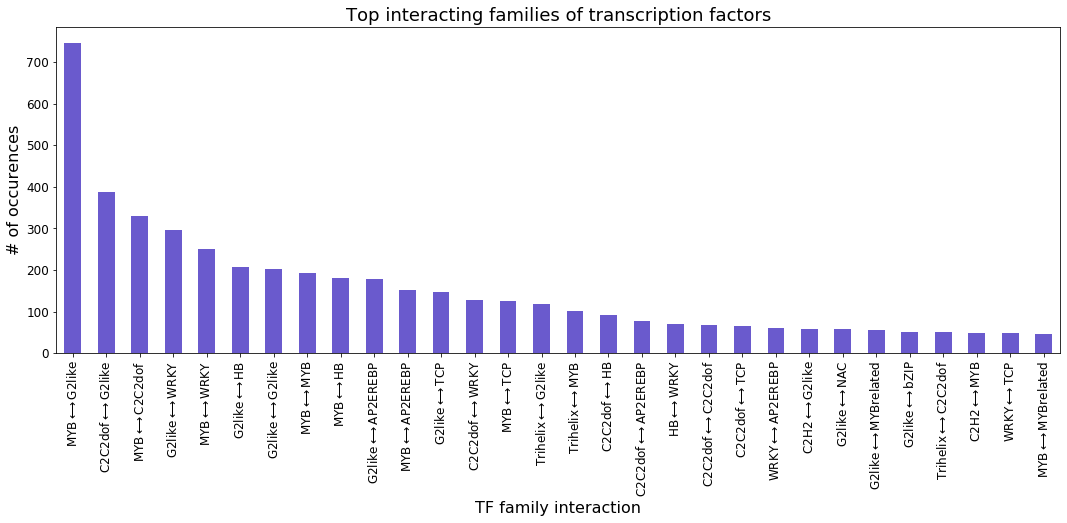

In [22]:
ax = df['Family_Interaction'].value_counts()[:30].plot(kind='bar',color='slateblue',figsize=(18,6),fontsize=12)
ax.set_xlabel("TF family interaction",fontsize=16)
ax.set_ylabel("# of occurences",fontsize=16)
ax.xaxis.set_tick_params(rotation=90)
ax.set_title('Top interacting families of transcription factors',fontsize=18)
plt.savefig('Family_interactions_Arabidopsis.pdf',bbox_inches='tight')

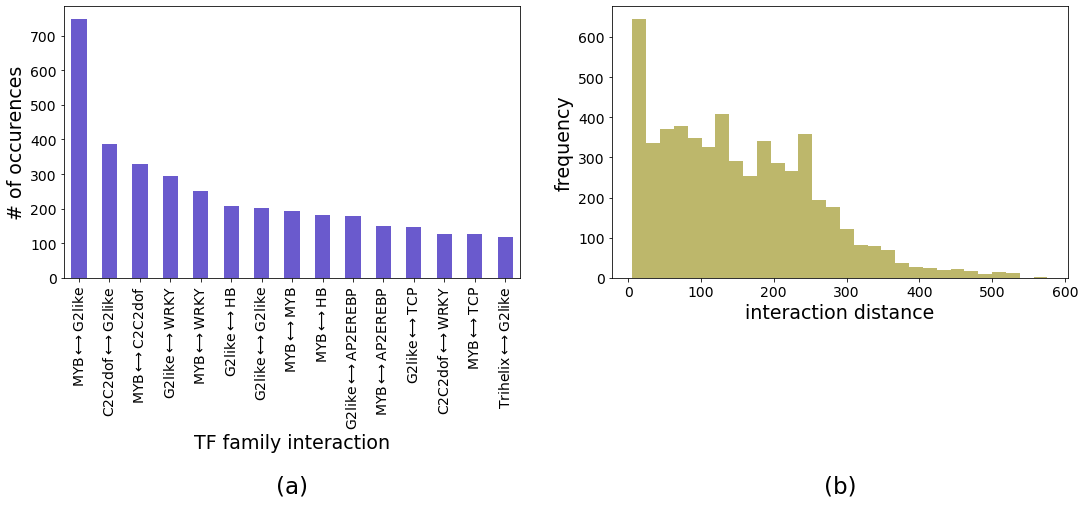

In [23]:
fig, axes = plt.subplots(1, 2)
#ax1 = df['TF_interaction'].value_counts()[:20].plot(kind='bar',color='salmon',figsize=(18,5),fontsize=12,ax=axes[0])
#ax1.set_xlabel("motif interaction",fontsize=16)
#ax1.set_ylabel("# of occurences",fontsize=16)
#ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Most frequent interactions',fontsize=16)
ax1 = df['Family_Interaction'].value_counts()[:15].plot(kind='bar',color='slateblue',figsize=(18,6),fontsize=14,ax=axes[0])
ax1.set_xlabel("TF family interaction",fontsize=19)
ax1.set_ylabel("# of occurences",fontsize=19)
ax1.xaxis.set_tick_params(rotation=90)
#ax1.set_title('Top interacting families of transcription factors',fontsize=18)


ax2 = df['mean_distance'].plot(kind='hist',bins=30, figsize=(18,5),color='darkkhaki',fontsize=14,ax=axes[1])
ax2.set_xlabel("interaction distance",fontsize=19)
ax2.set_ylabel("frequency",fontsize=19)
ax2.xaxis.set_tick_params(rotation=0)
#ax2.set_title('Distribution of motif interaction distances',fontsize=18)

ax1.text(0.5,-0.79, "(a)", size=23, ha="center", 
         transform=ax1.transAxes)
ax2.text(0.5,-0.79, "(b)", size=23, ha="center", 
         transform=ax2.transAxes)
#df_list[count].plot(ax=axes[1,1])
plt.savefig('Main_Arabidopsis.pdf',bbox_inches='tight')

In [24]:
len(df['TF_interaction'].value_counts()),np.median(df['TF_interaction'].value_counts())

(557, 3.0)

In [25]:
df['motifsOnlyInt'] = df['motif1']+':'+df['motif2']
df['familyOnlyInt'] = df['TF_A_Family']+':'+df['TF_B_Family']
df.to_csv('Attn_Arabidoposis_Final.txt',sep='\t')

In [26]:
#!ls -ll Attn_Arabidopsis_Final.txt

In [27]:
dfx = df[['filter_interaction','TF_interaction','Family_Interaction','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_interaction')
dfx.to_csv('ATTN_TF_unique_interactions_Arabidopsis.csv',index=None)
